<a href="https://colab.research.google.com/github/pythonuzgit/Large-language-Model/blob/main/Text_summarization_with_Large_Language_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=7e9c83ad79abe81ce81b69751ba6fe27f835876519c4e860f9eac07375e5e1a9
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 29.2 MB/s eta 0:00:00


In [ ]:
!kaggle datasets download -d prox37/twitter-multilabel-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/prox37/twitter-multilabel-classification-dataset
License(s): other
  0% 0.00/1.07M [00:00<?, ?B/s]
100% 1.07M/1.07M [00:00<00:00, 109MB/s]


In [ ]:
#Importing Libraries

# Data Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset, load_metric
import shutil

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
#import statsmodels.api as sm # import statement that caused the error
from scipy.stats import shapiro, skew, anderson, kstest, gaussian_kde,spearmanr
import math

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Transformers
from transformers import BartTokenizer, BartForConditionalGeneration      # BERT Tokenizer and architecture
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments         # These will help us to fine-tune our model
from transformers import pipeline                                         # Pipeline
from transformers import DataCollatorForSeq2Seq                           # DataCollator to batch the data
import torch                                                              # PyTorch
import evaluate                                                           # Hugging Face's library for model evaluation


# Other NLP libraries
from textblob import TextBlob                                             # This is going to help us fix spelling mistakes in texts
from sklearn.feature_extraction.text import TfidfVectorizer               # This is going to helps identify the most common terms in the corpus
import re                                                                 # This library allows us to clean text data
import nltk                                                               # Natural Language Toolkit
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Loading Data

In [ ]:
tweets_df = pd.read_csv('/content/mLabel_tweets.csv')
tweets_df.head()

,ID,tweet,labels
0,1296010336907038720t,@cath__kath AstraZeneca is made with the kidne...,ingredients
1,1336808189677940736t,It begins. Please find safe alternatives to th...,side-effect
2,1329488407307956231t,"@PaolaQP1231 Well, I mean congratulations Covi...",side-effect
3,1364194604459900934t,@BorisJohnson for those of us that do not wish...,mandatory
4,1375938799247765515t,She has been trying to speak out: writing lett...,side-effect rushed


In [ ]:
tweets_df.tail()

,ID,tweet,labels
9916,1388469392866938880t,Former Pfizer Chief Scientific Officer on Expe...,side-effect
9917,1352957607393300485t,@garygilligan Not what the manufacturer's are ...,pharma
9918,1357484621542268928t,//That's a complete no for now on the Oxford/A...,none
9919,1371121610057388037t,Opinion: Vaccine side effects..- possible to h...,side-effect
9920,1432823808742903817t,@BorisJohnson resign now before you destroy th...,political


Split Dataset into Train and Test splits¶


In [ ]:
tweets_df = pd.read_csv('/content/mLabel_tweets.csv')
tweets_df['labels'] = tweets_df['labels'].astype('category')
idx_to_cat = dict(enumerate(tweets_df['labels'].cat.categories))
cat_columns = tweets_df.select_dtypes(['category']).columns
tweets_df[cat_columns] = tweets_df[cat_columns].apply(lambda x: x.cat.codes)

test_split = int(len(tweets_df)*0.70)
train_df = tweets_df[:test_split]
test_df = tweets_df[test_split:]

val_split = int(len(test_df)*0.5)
test_df = test_df[:val_split]
val_df = test_df[val_split:]

train_df.to_csv('tweets_train.csv')
test_df.to_csv('tweets_test.csv')
val_df.to_csv('tweets_val.csv')


In [ ]:
# Configuring Pandas to exhibit larger columns
'''
This is going to allow us to fully read the dialogues and their summary
'''
pd.set_option('display.max_colwidth', 1000)

In [ ]:
# Configuring notebook
seed = 42
#paper_color =
#bg_color =
colormap = 'cividis'
template = 'plotly_dark'

In [ ]:
# Checking if GPU is available
if torch.cuda.is_available():
    print("GPU is available. \nUsing GPU")
    device = torch.device('cuda')
else:
    print("GPU is not available. \nUsing CPU")
    device = torch.device('cpu')

GPU is available. 
Using GPU


Exploring the Dataset

In [ ]:
# Loading data
train = pd.read_csv('/content/tweets_train.csv')
test = pd.read_csv('/content/tweets_test.csv')
val = pd.read_csv('/content/tweets_val.csv')


Train Dataset

In [ ]:
# Extracting info on the training Dataframe
train.describe()

,Unnamed: 0,labels
count,6944.000000,6944.000000
mean,3471.500000,148.732287
std,2004.704467,71.332860
min,0.000000,0.000000
25%,1735.750000,91.000000
50%,3471.500000,172.000000
75%,5207.250000,209.000000
max,6943.000000,287.000000


In [ ]:
mask = train['tweet'].isnull() # Creating mask with null dialogues
filtered_train = train[mask] # filtering dataframe
filtered_train # Visualizing

,Unnamed: 0,ID,tweet,labels


In [ ]:
train = train.dropna() # removing null values

In [ ]:
# Defining the variable 'categorical_features' as a list
categorical_features = ['id', 'tweet', 'label'] # Assigning sample values

# Removing 'Id' from categorical features list
categorical_features.remove('id')

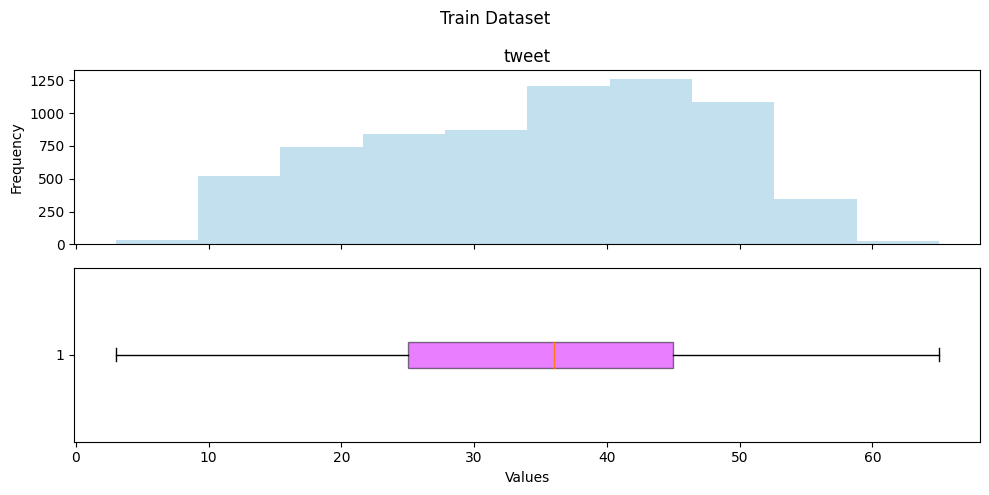

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from my_plotting_library import histogram_boxplot

# Defining the variable 'categorical_features' as a list
categorical_features = ['id', 'tweet', 'label'] # Assigning sample values

# Removing 'Id' from categorical features list
categorical_features.remove('id')
categorical_features.remove('label') # Removing label from the list

df_text_lenght = pd.DataFrame() # Creating an empty dataframe
for feat in categorical_features: # Iterating through features --> Dialogue & Summary
    df_text_lenght[feat] = train[feat].apply(lambda x: len(str(x).split())) #  Counting words for each feature

# Plotting histogram-boxplot
# Changed the boolean to a tuple for figsize and the int values to floats for alpha
# The original code created a 2x1 subplot when only 1 was needed.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True)
axes[0].hist(df_text_lenght['tweet'], color='#89c2e0', alpha=0.5)
axes[0].set_title('tweet')
axes[0].set_ylabel('Frequency')
axes[1].boxplot(df_text_lenght['tweet'], vert=False, patch_artist=True, boxprops=dict(facecolor='#d500ff', alpha=0.5))
axes[1].set_xlabel('Values')
fig.suptitle('Train Dataset')
plt.tight_layout()
plt.show()

Preprocessing Data

One of the main advantages of working with pre-trained models, such as BART, is that these models are usually extremely robust and require very little data preprocessing.

In [ ]:
print(train['tweet'].iloc[0])

@cath__kath AstraZeneca is made with the kidney cells of a little girl aborted back in the 70s.


In [ ]:
print(train['tweet'].iloc[990])

The medical community is racing to understand why six people developed blood clots in their brains after receiving the Johnson & Johnson vaccine.​ https://t.co/ISqn3Quj2h


Clean every text

In [ ]:
def clean_tags(text):
    clean = re.compile('<.*?>') # Compiling tags
    clean = re.sub(clean, '', text) # Replacing tags text by an empty string

    # Removing empty dialogues
    clean = '\n'.join([line for line in clean.split('\n') if not re.match('.*:\s*$', line)])

    return clean

In [ ]:
!pip install nltk # install nltk if you haven't already
import nltk # import nltk
nltk.download('stopwords') # download stopwords
from nltk.corpus import stopwords # import stopwords from nltk.corpus

stop_words = set(stopwords.words('english'))
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Defining function to clean every text in the dataset.
def clean_df(df, cols):
    for col in cols:
        df[col] = df[col].fillna('').apply(clean_tags)
    return df

In [ ]:
%%time
# preprocessing functions
stop_words = set(stopwords.words('english'))

def text_preprocessing(text):
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('ð@\w+\s*', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('http', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', '', text)
    return text

CPU times: user 1.29 ms, sys: 0 ns, total: 1.29 ms
Wall time: 5.91 ms


In [ ]:
# Cleaning texts in all datasets
train = clean_df(train,['tweet'])
test = clean_df(test,['tweet',])
val = clean_df(val,['tweet',])

In [ ]:
# Cleaning texts in all datasets
train['tweet'] = train['tweet'].apply(text_preprocessing)
test['tweet'] = test['tweet'].apply(text_preprocessing)
val['tweet'] = val['tweet'].apply(text_preprocessing)

In [ ]:
train.tail(3) # Visualizing results

,Unnamed: 0,ID,tweet,labels
6941,6941,1353304464266993666t,jburnmurdoch the effects of incomplete vaccination may already be showing as astrazeneca trial shot infections were excluded from shot s t co,209
6942,6942,1276219822217539586t,govmikedewine uchealth has he studied and followed the failed vaccines for covid for the last years he s old enough to know about the failed animal trials even as of last year we have lived and still maintained life with covid all these years over years now and you re trying to play us now,209
6943,6943,1420593241192230915t,abledoc prevenar seems to be a blockbuster product of pfizer w a billion sales year and now their covid vax has surpassed that a whopping billion sales expected in no wonder they are pitching for a booster dose to rake in more moolah s t co s t co,118


use the 🤗 Datasets library to convert our Pandas Dataframes to Datasets

In [ ]:
# Transforming dataframes into datasets
train_ds = Dataset.from_pandas(train)
test_ds = Dataset.from_pandas(test)
val_ds = Dataset.from_pandas(val)

# Visualizing results
print(train_ds)
print('\n' * 2)
print(test_ds)
print('\n' * 2)
print(val_ds)

Dataset({
    features: ['Unnamed: 0', 'ID', 'tweet', 'labels'],
    num_rows: 6944
})



Dataset({
    features: ['Unnamed: 0', 'ID', 'tweet', 'labels'],
    num_rows: 1488
})



Dataset({
    features: ['Unnamed: 0', 'ID', 'tweet', 'labels'],
    num_rows: 0
})


In [ ]:
train_ds[0] # Visualizing the first row

{'Unnamed: 0': 0,
 'ID': '1296010336907038720t',
 'tweet': ' cathkath astrazeneca is made with the kidney cells of a little girl aborted back in the  ',
 'labels': 72}


Modeling

In [ ]:
# Loading summarization pipeline with the bart-large-cnn model
summarizer = pipeline('summarization', model = 'facebook/bart-large-xsum')

config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


load BartTokenizer and BartForConditionalGeneration using the facebook/bart-large-xsum checkpoint.

In [ ]:
checkpoint = 'facebook/bart-large-xsum' # Model
tokenizer = BartTokenizer.from_pretrained(checkpoint) # Loading Tokenizer

In [ ]:
model = BartForConditionalGeneration.from_pretrained(checkpoint) # Loading Model

We can also print below the architecture of the model

In [ ]:
print(model) # Visualizing model's architecture

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_l

In [ ]:
def preprocess_function(examples):
    inputs = [doc for doc in examples["tweet"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["labels"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
def preprocess_function(examples):
    inputs = [doc for doc in examples["tweet"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        # Convert labels to strings
        labels = tokenizer([str(label) for label in examples["labels"]], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
# Applying preprocess_function to the datasets
tokenized_train = train_ds.map(preprocess_function, batched=True,
                               remove_columns=['Unnamed: 0', 'ID', 'tweet', 'labels',]) # Removing features

tokenized_test = test_ds.map(preprocess_function, batched=True,
                               remove_columns=['Unnamed: 0', 'ID', 'tweet', 'labels']) # Removing features

tokenized_val = val_ds.map(preprocess_function, batched=True,
                               remove_columns=['Unnamed: 0', 'ID', 'tweet', 'labels']) # Removing features

# Printing results
print('\n' * 3)
print('Preprocessed Training Dataset:\n')
print(tokenized_train)
print('\n' * 2)
print('Preprocessed Test Dataset:\n')
print(tokenized_test)
print('\n' * 2)
print('Preprocessed Validation Dataset:\n')
print(tokenized_val)

Map:   0%|          | 0/6944 [00:00<?, ? examples/s]

Map:   0%|          | 0/1488 [00:00<?, ? examples/s]





Preprocessed Training Dataset:

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 6944
})



Preprocessed Test Dataset:

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 1488
})



Preprocessed Validation Dataset:

Dataset({
    features: [],
    num_rows: 0
})


tokenized datasets consist now of only three features, input_ids, attention_mask, and labels.

In [ ]:
# Selecting a sample from the dataset
sample = tokenized_train[0]

# Printing its features
print("input_ids:")
print(sample['input_ids'])
print("\n")
print("attention_mask:")
print(sample['attention_mask'])
print("\n")
print("sample:")
print(sample['labels'])
print("\n")

input_ids:
[0, 31420, 330, 2681, 12976, 43280, 15366, 16, 156, 19, 5, 12855, 4590, 9, 10, 410, 1816, 38166, 124, 11, 5, 1437, 1437, 2]


attention_mask:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


sample:
[0, 4956, 2]




use DataCollatorForSeq2Seq to batch the data

In [ ]:
# Instantiating Data Collator
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

load the ROUGE metrics and define a new function to evaluate the model.

In [ ]:
metric = load_metric('rouge') # Loading ROUGE Score

The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred# Obtaining predictions and true labels

    # Decoding predictions
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Obtaining the true labels tokens, while eliminating any possible masked token (i.e., label = -100)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]


    # Computing rouge score
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()} # Extracting some results

    # Add mean-generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

use the Seq2SeqTrainingArguments class to set some relevant settings for fine-tuning

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir = 'bart_samsum',
    evaluation_strategy = "epoch",
    save_strategy = 'epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'eval_loss',
    seed = seed,
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=4,
    predict_with_generate=True,
    fp16=True,
    report_to="none"
)

In [ ]:
# Defining Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train() # Training model

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,1.395600,2.088401,17.601900,0.000000,17.558200,17.523500,12.039000
2,0.662700,1.880469,34.397600,0.000000,34.400000,34.380000,12.000000
3,0.495500,1.706219,26.624600,0.000000,26.655300,26.652300,12.000000
4,0.398100,2.393306,20.411900,0.000000,20.407200,20.403800,12.000000


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a G

TrainOutput(global_step=3472, training_loss=0.6769348926807878, metrics={'train_runtime': 2428.4332, 'train_samples_per_second': 11.438, 'train_steps_per_second': 1.43, 'total_flos': 4114324274380800.0, 'train_loss': 0.6769348926807878, 'epoch': 4.0})